<a href="https://colab.research.google.com/github/ob3dd/Adult-Income-and-Wine-Quality-/blob/main/Modeling_and_Preprocessing_for_Adult_Income.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Import Libraries**

In [1]:
# Pandas
import pandas as pd
# Numpy
import numpy as np
# MatplotLib
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_selector
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression

# Classification Metrics

from sklearn.metrics import (roc_auc_score, ConfusionMatrixDisplay,
                             PrecisionRecallDisplay, RocCurveDisplay,
                             f1_score, accuracy_score, precision_score,
                             recall_score, classification_report)
# Set global scikit-learn configuration
from sklearn import set_config
# Display estimators as a diagram
set_config(display='diagram') # 'text' or 'diagram'}


from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


import warnings
warnings.filterwarnings('ignore')

##**Reloading the data**

In [2]:
fpath = '/content/drive/MyDrive/CodingDojo/02-MachineLearning/Week08/adult.csv'
df = pd.read_csv(fpath)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [3]:
df2 = df.copy()
df2.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


##**Performing Preprocessing Steps**

In [4]:
# Drop columns
columns_to_drop = ['fnlwgt', 'capital-loss', 'capital-loss', 'marital-status', 'race', 'educational-num']
df.drop(columns_to_drop, axis=1, inplace=True)

These columns aren't relevant to our data, so they will be dropped.

In [5]:
# Check for dulplicates
df2.duplicated().sum()
print (f"There are {df.duplicated().sum()} duplicates in the dataset")

There are 9076 duplicates in the dataset


In [6]:
# Dropping Duplicates
df2.drop_duplicates(inplace=True)

In [7]:
# Recheck for duplicates
df2.duplicated().sum()
print (f"There are {df2.duplicated().sum()} duplicates in the dataset")

There are 0 duplicates in the dataset


###**Handling Missing Values**

In [8]:
# Checking for missing values
df2.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

## **Fixing Inconsistencies**

In [9]:
# Viewing all data types
dtypes = df.dtypes
str_cols = dtypes[dtypes=='object'].index
str_cols

Index(['workclass', 'education', 'occupation', 'relationship', 'gender',
       'native-country', 'income'],
      dtype='object')

In [10]:
# creating a for loop that loops through my string column
for col in str_cols:
  print(f"- Column = {col}")
  print(df[col].value_counts(dropna=False))
  print('\n\n')

- Column = workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64



- Column = education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64



- Column = occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      149

In [11]:
# checking for inconsistent numeric features
df.describe(exclude= 'object')

,age,capital-gain,hours-per-week
count,48842.000000,48842.000000,48842.000000
mean,38.643585,1079.067626,40.422382
std,13.710510,7452.019058,12.391444
min,17.000000,0.000000,1.000000
25%,28.000000,0.000000,40.000000
50%,37.000000,0.000000,40.000000
75%,48.000000,0.000000,45.000000
max,90.000000,99999.000000,99.000000


In [12]:
# checking for inconsistent categorical features
df.describe(exclude= 'number')

,workclass,education,occupation,relationship,gender,native-country,income
count,48842,48842,48842,48842,48842,48842,48842
unique,9,16,15,6,2,42,2
top,Private,HS-grad,Prof-specialty,Husband,Male,United-States,<=50K
freq,33906,15784,6172,19716,32650,43832,37155


##**Defining X and Y**

In [13]:
## Define X and y
target = 'income'
df2['income'] = df['income'].map({'>50K': 1, '<=50K': 0})
X = df2.drop(columns=target).copy()
y = df2[target].copy()
X.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States


##**Train-Test-Split**

In [14]:
# Perfoming a train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

##**Pipleline for Categorical Data**



### **ColumnSelector**

#### **Numeric Transformation**

In [15]:
# Pipeline
scaler = StandardScaler()
num_pipe = make_pipeline(scaler)

# Selector
num_selector = make_column_selector(dtype_include= 'number')

# Tuple
num_tuple = (num_pipe, num_selector)

In [16]:
num_selector(X_train)

['age',
 'fnlwgt',
 'educational-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

#### **Categorical Transformation**

In [17]:
ohe_cols = X_train.select_dtypes('object').columns

impute_missing = SimpleImputer(strategy='constant', fill_value='MISSING')
ohe_encoder = OneHotEncoder(sparse_output = False, handle_unknown='ignore')
ohe_pipe = make_pipeline(impute_missing, ohe_encoder)
ohe_pipe

# Making a ohe_tuple for ColumnTransformer
ohe_tuple = (ohe_pipe, ohe_cols)
ohe_tuple

(Pipeline(steps=[('simpleimputer',
                  SimpleImputer(fill_value='MISSING', strategy='constant')),
                 ('onehotencoder',
                  OneHotEncoder(handle_unknown='ignore', sparse_output=False))]),
 Index(['workclass', 'education', 'marital-status', 'occupation',
        'relationship', 'race', 'gender', 'native-country'],
       dtype='object'))

In [18]:
# Instantiate the make column transformer
preprocessor = make_column_transformer(num_tuple,
                                       ohe_tuple,
                                       remainder='drop')

##**Build Logreg Model**

##**Evaluate Model**

In [19]:
## Create a function to display the classification metrics of a model
def classification_metrics(model, X_test, y_test, label='Test Data',
                             figsize=(15,5), normalize='true',
                             cmap='Blues', thresh=.5):

    fig, axes = plt.subplots(1,2, figsize=figsize)

    ## Get the predictions
    y_proba = model.predict_proba(X_test)
    y_pred = [1 if x[1] > thresh else 0 for x in y_proba]

    ## Print classification report for the test data (and make it pretty!)
    print('---'*20)
    print(f"[i] CLASSIFICATION REPORT FOR: {label}")
    print('---'*20)

    print(classification_report(y_test, y_pred))

    ConfusionMatrixDisplay.from_predictions(y_test,y_pred,
                normalize=normalize, cmap=cmap,
                ax=axes[0])

    RocCurveDisplay.from_estimator(model, X_test, y_test,
                                   ax=axes[1])
    plt.show()

### **KNN Model**

In [20]:
# Create an instance of the model
knn = KNeighborsClassifier()
# Create a model pipeline
knn_pipe = make_pipeline(preprocessor, knn)
## Fit the model
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7c8118790d30>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='MISSING',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country'],
      dtype='object'))])),
                ('kneighborsclassifier', KNeighborsClassifier())])

### **KNN Model Evaluation**

In [21]:
## Save the model's predictions for the train dataset
knn_train_preds = knn_pipe.predict(X_train)
## Save the model's predictions for the test dataset
knn_test_preds = knn_pipe.predict(X_test)

In [22]:
## print the classification reports
print('Train Report')
print(classification_report(y_train, knn_train_preds))

print('Test Report')
print(classification_report(y_test, knn_test_preds))

Train Report
              precision    recall  f1-score   support

           0       0.91      0.94      0.92     27841
           1       0.79      0.70      0.74      8751

    accuracy                           0.88     36592
   macro avg       0.85      0.82      0.83     36592
weighted avg       0.88      0.88      0.88     36592

Test Report
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      9268
           1       0.67      0.59      0.63      2930

    accuracy                           0.83     12198
   macro avg       0.77      0.75      0.76     12198
weighted avg       0.83      0.83      0.83     12198



- Our accuracy was 83% and 94% recall value
- I would say this needs some tuning. Let's get the possible best evaluation on our model.

#### **Tune the Hyperparameters**

In [23]:
# Display the hyperparameters.
knn_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('pipeline-1',
                                    Pipeline(steps=[('standardscaler',
                                                     StandardScaler())]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7c8118790d30>),
                                   ('pipeline-2',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(fill_value='MISSING',
                                                                   strategy='constant')),
                                                    ('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   sparse_output=False))]),
                                    Index(['workclass', 'education', 'marital-st

In [24]:
# Create a dictionary of parameters

params = {'kneighborsclassifier__n_neighbors': range(1,15),
          'kneighborsclassifier__weights': ['distance','uniform']}

In [25]:
# Tune hyperparameters with GridSearchCV
knn_gs = GridSearchCV(knn_pipe, params)
knn_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7c8118790d30>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(fill_value='MISSING',
                                                                                                        strategy='constant')),
                                                                                         ('on...
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country'],
      dtype='object'))])),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'kneighborsclassifier__n_neighbors': range(1, 15),
                         'kneighborsclassifier__weights': ['distance',
                                                           'uniform']})

In [26]:
knn_gs.best_params_

{'kneighborsclassifier__n_neighbors': 14,
 'kneighborsclassifier__weights': 'uniform'}

In [27]:
knn_gs.best_score_

0.8417140694992771

In [28]:
best_knn = knn_gs.best_estimator_

In [29]:
#check the best parameter
# Instantiate and fit GridSearchCV
train_preds = best_knn.predict(X_train)
test_preds = best_knn.predict(X_test)

In [30]:
print('Train\n', classification_report(y_train, train_preds))
print('Test\n', classification_report(y_test, test_preds))

Train
               precision    recall  f1-score   support

           0       0.88      0.94      0.91     27841
           1       0.77      0.60      0.67      8751

    accuracy                           0.86     36592
   macro avg       0.82      0.77      0.79     36592
weighted avg       0.85      0.86      0.85     36592

Test
               precision    recall  f1-score   support

           0       0.87      0.93      0.90      9268
           1       0.72      0.54      0.62      2930

    accuracy                           0.84     12198
   macro avg       0.79      0.74      0.76     12198
weighted avg       0.83      0.84      0.83     12198



- There was a little change. It increased by 1% (83%-84%).
- And our recall went from a 94% to and 93%.

CPU times: user 165 ms, sys: 4.01 ms, total: 169 ms
Wall time: 191 ms


Text(0.5, 1.0, 'Test CM')

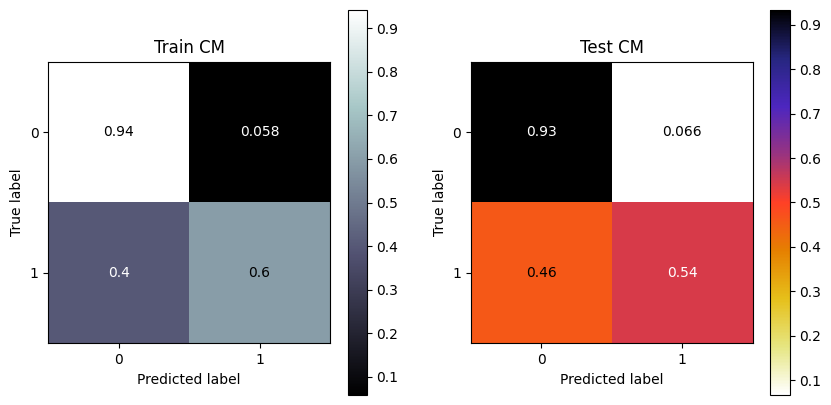

In [47]:
# Check the class balance again to help us choose a metric
# Display the test and training Confusion Matrix
%%time
fig, axes = plt.subplots(ncols=2, figsize=(10,5))

ConfusionMatrixDisplay.from_predictions(y_train, train_preds,
                                        ax=axes[0], cmap='bone',normalize='true')

axes[0].set_title('Train CM')
ConfusionMatrixDisplay.from_predictions(y_test, test_preds,
                                        ax=axes[1], cmap='CMRmap_r',normalize='true')

axes[1].set_title('Test CM');


###**LogReg Model**

In [32]:
# Create an instance of the model
lr = LogisticRegression(random_state =42)
# Create a model pipeline
lr_pipe = make_pipeline(preprocessor, lr)
## Fit the model
lr_pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7c8118790d30>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='MISSING',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country'],
      dtype='object'))])),
                ('logisticregression', LogisticRegression(random_state=42))])

In [33]:
## Save the model's predictions for the train dataset
lr_train_preds = lr_pipe.predict(X_train)
## Save the model's predictions for the test dataset
lr_test_preds = lr_pipe.predict(X_test)

In [34]:
## print the classification reports
print('Train Report')
print(classification_report(y_train, lr_train_preds))

print('Test Report')
print(classification_report(y_test, lr_test_preds))

Train Report
              precision    recall  f1-score   support

           0       0.88      0.93      0.91     27841
           1       0.74      0.60      0.66      8751

    accuracy                           0.85     36592
   macro avg       0.81      0.77      0.78     36592
weighted avg       0.85      0.85      0.85     36592

Test Report
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      9268
           1       0.74      0.58      0.65      2930

    accuracy                           0.85     12198
   macro avg       0.81      0.76      0.78     12198
weighted avg       0.85      0.85      0.85     12198



------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Training Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.76      0.85     27841
           1       0.54      0.88      0.67      8751

    accuracy                           0.79     36592
   macro avg       0.75      0.82      0.76     36592
weighted avg       0.86      0.79      0.81     36592



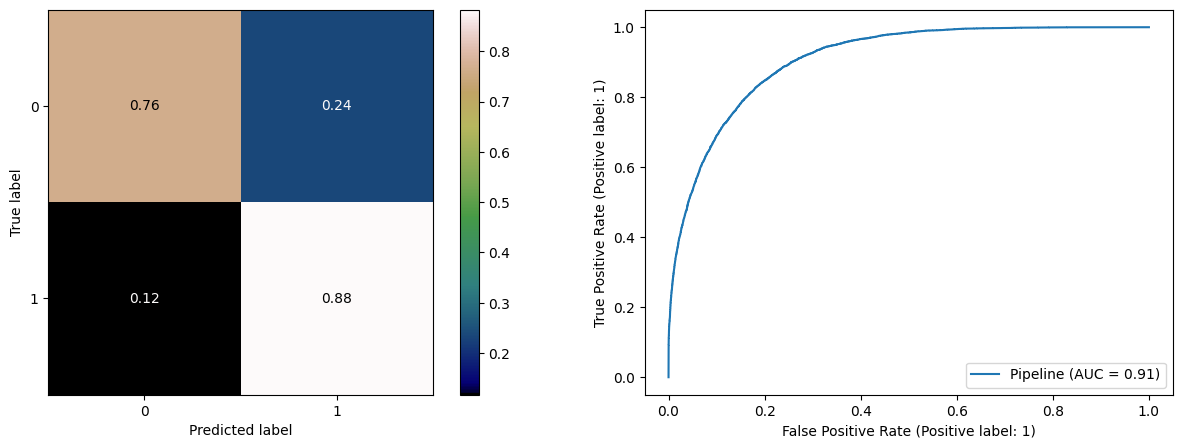

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.77      0.85      9268
           1       0.54      0.88      0.67      2930

    accuracy                           0.79     12198
   macro avg       0.75      0.82      0.76     12198
weighted avg       0.85      0.79      0.81     12198



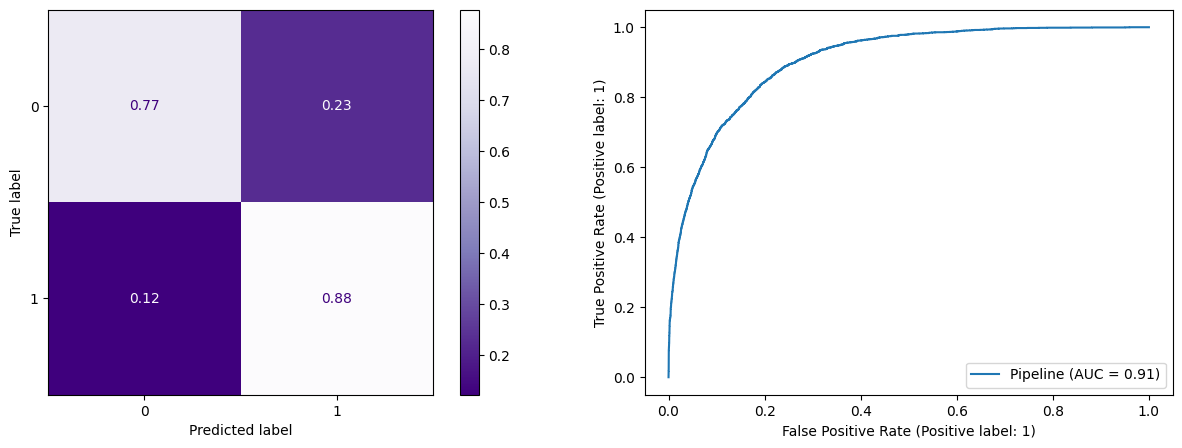

CPU times: user 1.52 s, sys: 537 ms, total: 2.06 s
Wall time: 1.55 s


In [35]:
## Use the function twice to evaluate our model on training AND test data (adding %%time to see how long it takes to run)
%%time
classification_metrics(lr_pipe, X_train,y_train, thresh=.2,
                         cmap='gist_earth', label='Training Data')
classification_metrics(lr_pipe, X_test,y_test, thresh=.2,
                         cmap='Purples_r',label='Test Data')

- Our LogReg Model performed poorly. Poviding us with 79% accuracy.
- We will need to tune it.

#### **Tune the Hyperparameters**

In [36]:
# Display the hyperparameters.
lr_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('pipeline-1',
                                    Pipeline(steps=[('standardscaler',
                                                     StandardScaler())]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7c8118790d30>),
                                   ('pipeline-2',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(fill_value='MISSING',
                                                                   strategy='constant')),
                                                    ('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   sparse_output=False))]),
                                    Index(['workclass', 'education', 'marital-st

In [37]:
# Create a dictionary of parameters
params = {'logisticregression__C': [5, 10, 15, 20, 25, 30, 35]}

In [38]:
# Tune hyperparameters with GridSearchCV
lr_gs = GridSearchCV(lr_pipe, params)
lr_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7c8118790d30>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(fill_value='MISSING',
                                                                                                        strategy='constant')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country'],
      dtype='object'))])),
                                       ('logisticregression',
                                        LogisticRegression(random_state=42))]),
             param_grid={'logisticregression__C': [5, 10, 15, 20, 25, 30, 35]})

In [39]:
lr_gs.best_params_

{'logisticregression__C': 30}

In [40]:
best_lr = lr_gs.best_estimator_

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Training Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.76      0.85     27841
           1       0.54      0.88      0.67      8751

    accuracy                           0.79     36592
   macro avg       0.75      0.82      0.76     36592
weighted avg       0.86      0.79      0.81     36592



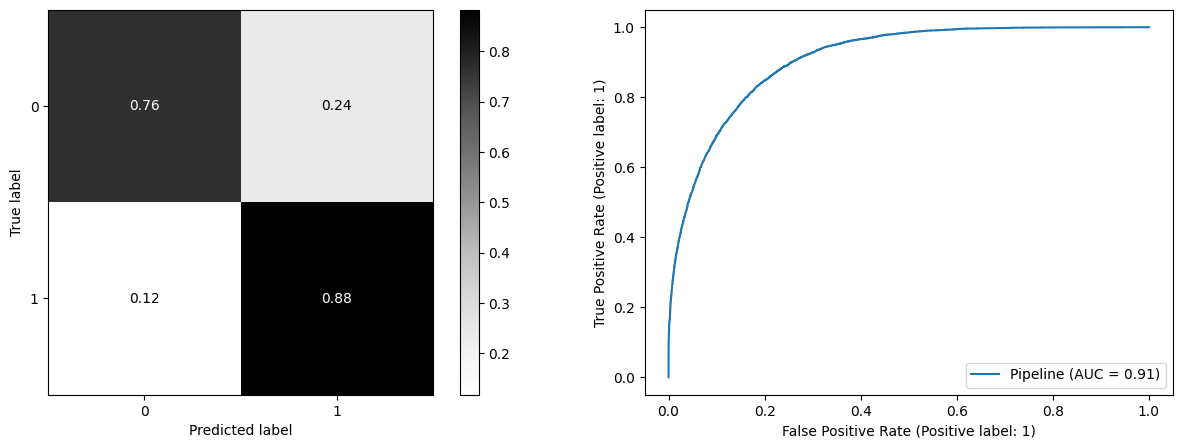

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.77      0.85      9268
           1       0.55      0.88      0.67      2930

    accuracy                           0.79     12198
   macro avg       0.75      0.82      0.76     12198
weighted avg       0.85      0.79      0.81     12198



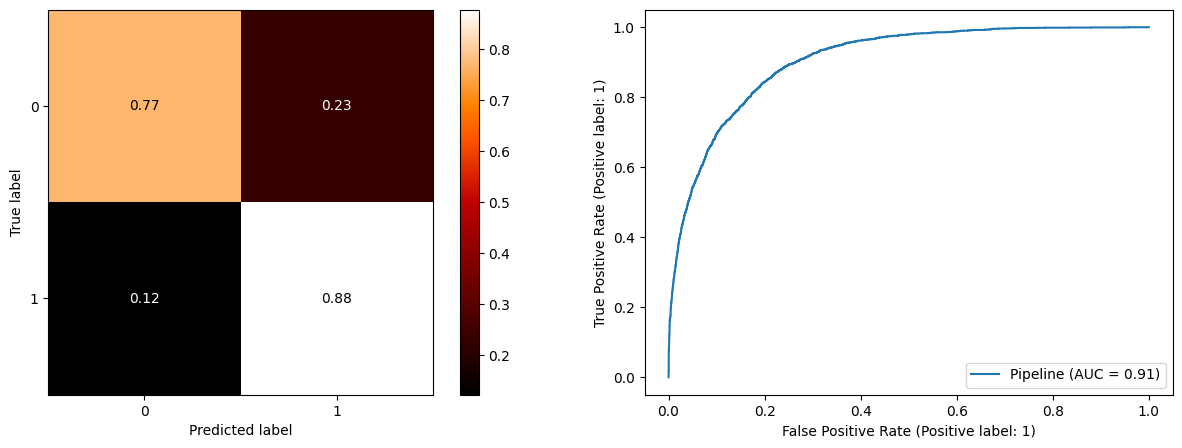

CPU times: user 1.68 s, sys: 475 ms, total: 2.15 s
Wall time: 1.68 s


In [41]:
## Use the function twice to evaluate our model on training AND test data (adding %%time to see how long it takes to run)
%%time
classification_metrics(best_lr, X_train,y_train, thresh=.2,
                         cmap='Greys', label='Training Data')
classification_metrics(best_lr, X_test,y_test, thresh=.2,
                         cmap='gist_heat',label='Test Data')

- There was no change in the prediction even after tuning.

###**Fit PC into KNN Model**

In [42]:
# Create a transformer pipeline
pca = PCA(.95)
transformer = make_pipeline(preprocessor, pca)
transformer.fit_transform(X_train).shape

(36592, 32)

In [43]:
# Put the PCA Pipeline in Another Pipeline with a KNN Model
knn_pipe_pca = make_pipeline(transformer, KNeighborsClassifier())
knn_pipe_pca.fit(X_train, y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columntransformer',
                                  ColumnTransformer(transformers=[('pipeline-1',
                                                                   Pipeline(steps=[('standardscaler',
                                                                                    StandardScaler())]),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7c8118790d30>),
                                                                  ('pipeline-2',
                                                                   Pipeline(steps=[('simpleimputer',
                                                                                    SimpleImputer(fill_value='MISSING',
                                                                                                  strategy='constant')),
                                                                                   ('onehotencoder',
                                                                                    OneHotEncoder(handle_unknown='ignore',
                                                                                                  sparse_output=False))]),
                                                                   Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country'],
      dtype='object'))])),
                                 ('pca', PCA(n_components=0.95))])),
                ('kneighborsclassifier', KNeighborsClassifier())])

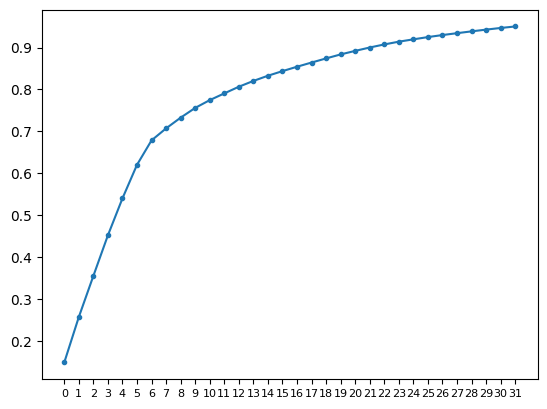

<Figure size 60000x10000 with 0 Axes>

In [44]:
# plot the cumulative sum of the percentage of explained variance for each component and those before it.
plt.plot(range(0, 32), pca.explained_variance_ratio_.cumsum(), marker= '.')
plt.xticks(ticks=range(0, 32), fontsize=8);
plt.figure(figsize=(600, 100));

##**Evaluate and compare the models**

In [45]:
def classification_metrics(y_true, y_pred, label='',
                           output_dict=False, figsize=(8,4),
                           normalize='true', cmap='Blues',
                           colorbar=False):
  # Get the classification report
  report = classification_report(y_true, y_pred)
  ## Print header and report
  header = "-"*70
  print(header, f" Classification Metrics: {label}", header, sep='\n')
  print(report)
  ## CONFUSION MATRICES SUBPLOTS
  fig, axes = plt.subplots(ncols=2, figsize=figsize)
  # create a confusion matrix  of raw counts
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=None, cmap='gist_gray', colorbar=colorbar,
                ax = axes[0],);
  axes[0].set_title("Raw Counts")
  # create a confusion matrix with the test data
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=normalize, cmap=cmap, colorbar=colorbar,
                ax = axes[1]);
  axes[1].set_title("Normalized Confusion Matrix")
  # Adjust layout and show figure
  fig.tight_layout()
  plt.show()
  # Return dictionary of classification_report
  if output_dict==True:
    report_dict = classification_report(y_true, y_pred, output_dict=True)
    return report_dict



def evaluate_classification(model, X_train, y_train, X_test, y_test,
                         figsize=(6,4), normalize='true', output_dict = False,
                            cmap_train='Blues', cmap_test="Reds",colorbar=False):
  # Get predictions for training data
  y_train_pred = model.predict(X_train)
  # Call the helper function to obtain regression metrics for training data
  results_train = classification_metrics(y_train, y_train_pred, #verbose = verbose,
                                     output_dict=True, figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_train,
                                     label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = model.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = classification_metrics(y_test, y_test_pred, #verbose = verbose,
                                  output_dict=True,figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_test,
                                    label='Test Data' )
  if output_dict == True:
    # Store results in a dataframe if ouput_frame is True
    results_dict = {'train':results_train,
                    'test': results_test}
    return results_dict



----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.94      0.92     27841
           1       0.79      0.70      0.74      8751

    accuracy                           0.88     36592
   macro avg       0.85      0.82      0.83     36592
weighted avg       0.88      0.88      0.88     36592



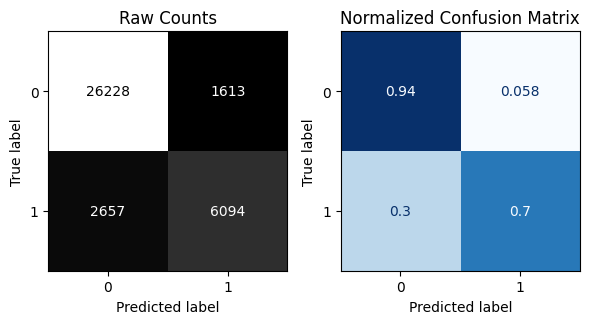


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      9268
           1       0.67      0.58      0.63      2930

    accuracy                           0.83     12198
   macro avg       0.77      0.75      0.76     12198
weighted avg       0.83      0.83      0.83     12198



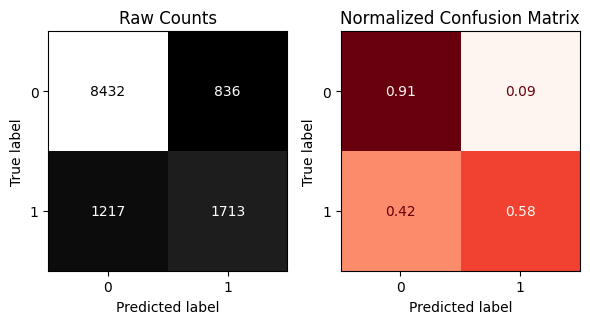

CPU times: user 21.7 s, sys: 733 ms, total: 22.4 s
Wall time: 14.5 s


In [46]:
# Evaluating our pca model(adding %%time to see how long it takes to run)
%%time
evaluate_classification(knn_pipe_pca, X_train, y_train, X_test, y_test)

- Surprisingly our PCA model gave us relatively the same result with our untuned KNN Model.

We would go with the tuned KNN Model for our production. It ran with less time and had the best accuracy compared to other models.